# Machine Learning Specialization - Supervised Learning: Regression and Classification
## Week 1: Linear Regression with One Variable - SOLUTIONS

### Learning Objectives:
- Understand the basics of linear regression
- Implement and compute cost functions
- Apply gradient descent algorithm
- Build intuition through hands-on implementation

### Key Concepts:
- **Linear Regression**: A method to predict continuous values using a linear relationship
- **Cost Function**: Measures how well our model fits the data (Mean Squared Error)
- **Gradient Descent**: An optimization algorithm to minimize the cost function

In this notebook, you'll see complete working implementations of linear regression from scratch using NumPy.

### 1. Import Required Libraries

Let's start by importing the necessary libraries for our exercises.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


### 2. Generate Synthetic Data

We'll create a simple dataset to work with. This represents a real-world scenario where we want to predict house prices based on their size.

In [3]:
# Generate synthetic data for house prices vs size
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Add intercept term (x0 = 1) to X
X = np.column_stack([np.ones(X.shape[0]), X])

# Reshape y to be a column vector
y = y.reshape(-1, 1)

print(f"Dataset shape: X = {X.shape}, y = {y.shape}")
print(f"First 5 samples:")
for i in range(5):
    print(f"House size: {X[i, 1]:.2f}, Price: {y[i, 0]:.2f}")

Dataset shape: X = (100, 2), y = (100, 1)
First 5 samples:
House size: 0.93, Price: 50.78
House size: 0.09, Price: -10.07
House size: -1.06, Price: -34.92
House size: 0.31, Price: 10.53
House size: -0.48, Price: -17.74


### 3. Visualize the Data

Let's plot our data to understand the relationship between house size and price.

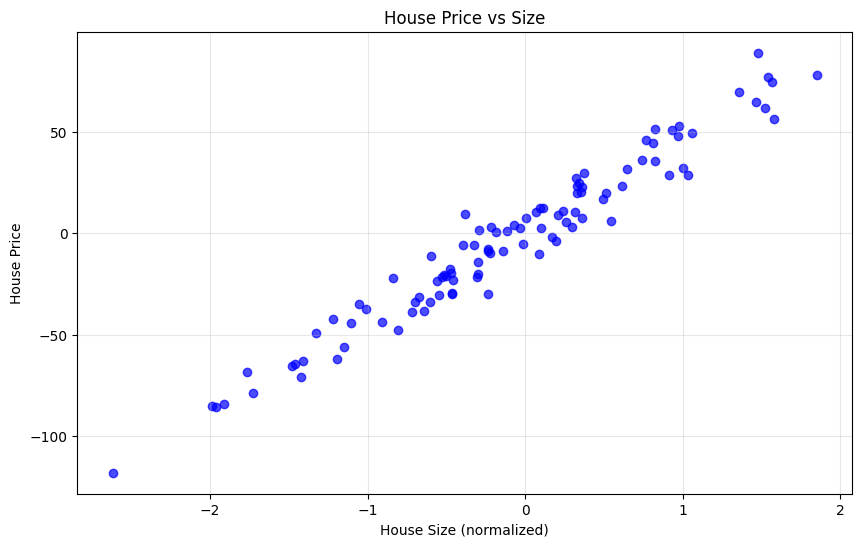

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], y, alpha=0.7, color='blue')
plt.xlabel('House Size (normalized)')
plt.ylabel('House Price')
plt.title('House Price vs Size')
plt.grid(True, alpha=0.3)
plt.show()

### 4. Linear Regression Model

The linear regression model can be expressed as:

$$h_\theta(x) = \theta_0 + \theta_1 x$$

Or in matrix form:

$$h_\theta(X) = X \theta$$

Where:
- $X$ is the feature matrix (with intercept column)
- $\theta$ is the parameter vector
- $h_\theta(X)$ is our prediction

In [5]:
def predict(X, theta):
    """
    Make predictions using linear regression model.
    
    Args:
        X: Feature matrix (m x n)
        theta: Parameter vector (n x 1)
    
    Returns:
        predictions: Predicted values (m x 1)
    """
    return np.dot(X, theta)

# Test the function with random theta
theta_test = np.array([[2.0], [1.5]])
predictions_test = predict(X[:5], theta_test)
print(f"Test predictions: {predictions_test.flatten()}")

Test predictions: [3.39692018 2.1305706  0.41343361 2.471371   1.28123864]


### 5. Cost Function

The cost function measures how well our model fits the data. For linear regression, we use the Mean Squared Error (MSE):

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2$$

Where:
- $m$ is the number of training examples
- $h_\theta(x^{(i)})$ is the prediction for the i-th example
- $y^{(i)}$ is the actual value for the i-th example

In [9]:
def compute_cost(X, y, theta):
    """
    Compute the cost function for linear regression.
    
    Args:
        X: Feature matrix (m x n)
        y: Target values (m x 1)
        theta: Parameter vector (n x 1)
    
    Returns:
        cost: The cost value (scalar)
    """
    m = len(y)  # number of training examples
    
    predictions = predict(X, theta)
    errors = predictions - y
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    
    return cost

# Test the cost function
theta_test = np.array([[2.0], [1.5]])
cost_test = compute_cost(X, y, theta_test)
print(f"Cost with theta = {theta_test.flatten()}: {cost_test:.4f}")

# Test with different theta values
theta_good = np.array([[0.0], [2.0]])
cost_good = compute_cost(X, y, theta_good)
print(f"Cost with better theta = {theta_good.flatten()}: {cost_good:.4f}")

Cost with theta = [2.  1.5]: 805.7095
Cost with better theta = [0. 2.]: 779.5248


### 6. Gradient Descent

Gradient descent is used to minimize the cost function. The algorithm updates parameters simultaneously:

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)$$

For linear regression, the partial derivative is:

$$\frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$$

Where:
- $\alpha$ is the learning rate
- $x_j^{(i)}$ is the j-th feature of the i-th training example

In [10]:
def gradient_descent(X, y, theta, alpha, num_iterations):
    """
    Perform gradient descent to learn theta.
    
    Args:
        X: Feature matrix (m x n)
        y: Target values (m x 1)
        theta: Initial parameter vector (n x 1)
        alpha: Learning rate
        num_iterations: Number of iterations
    
    Returns:
        theta: Optimized parameter vector
        cost_history: List of cost values over iterations
    """
    m = len(y)
    cost_history = []
    
    for iteration in range(num_iterations):
        predictions = predict(X, theta)
        errors = predictions - y
        gradient = (1 / m) * np.dot(X.T, errors)
        theta = theta - alpha * gradient
        
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        
        if iteration % 100 == 0:
            print(f"Iteration {iteration}: Cost = {cost:.4f}")
    
    return theta, cost_history

# Initialize theta with zeros
theta_initial = np.zeros((X.shape[1], 1))

# Set hyperparameters
alpha = 0.01
num_iterations = 1000

# Run gradient descent
theta_optimized, cost_history = gradient_descent(X, y, theta_initial, alpha, num_iterations)

print(f"\nOptimized theta: {theta_optimized.flatten()}")
print(f"Final cost: {cost_history[-1]:.4f}")

Iteration 0: Cost = 837.6664
Iteration 100: Cost = 191.9551
Iteration 200: Cost = 69.3156
Iteration 300: Cost = 45.1595
Iteration 400: Cost = 40.2858
Iteration 500: Cost = 39.2876
Iteration 600: Cost = 39.0813
Iteration 700: Cost = 39.0384
Iteration 800: Cost = 39.0295
Iteration 900: Cost = 39.0276

Optimized theta: [ 1.15857049 44.42210912]
Final cost: 39.0272


### 7. Visualize the Results

Let's plot the cost function over iterations and the fitted line.

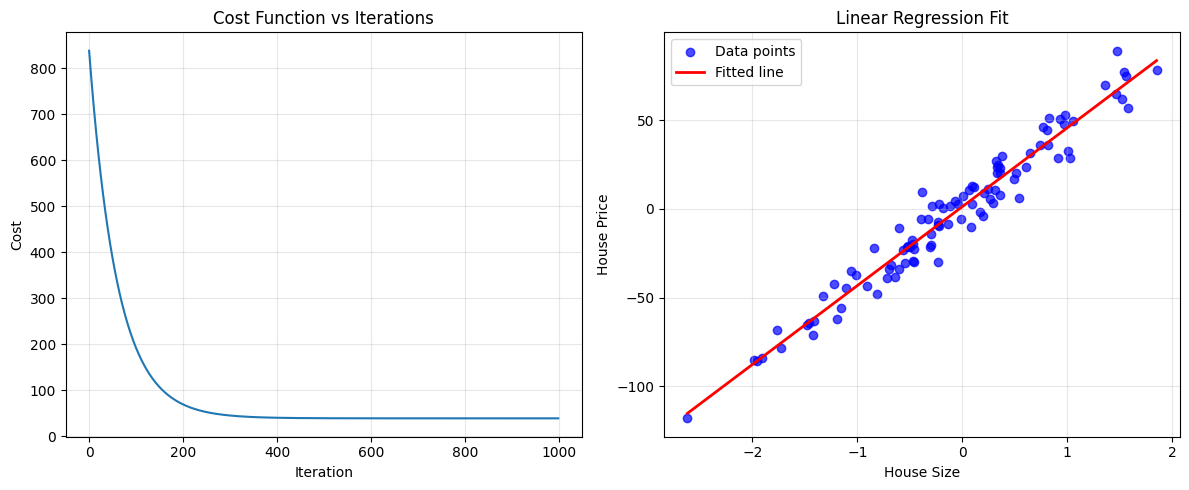

In [12]:
# Plot cost vs iterations
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function vs Iterations')
plt.grid(True, alpha=0.3)

# Plot fitted line
plt.subplot(1, 2, 2)
plt.scatter(X[:, 1], y, alpha=0.7, color='blue', label='Data points')

# Generate predictions for the fitted line
X_plot = np.linspace(X[:, 1].min(), X[:, 1].max(), 100).reshape(-1, 1)
X_plot_with_intercept = np.column_stack([np.ones(X_plot.shape[0]), X_plot])
y_plot = predict(X_plot_with_intercept, theta_optimized)

plt.plot(X_plot, y_plot, color='red', linewidth=2, label='Fitted line')
plt.xlabel('House Size')
plt.ylabel('House Price')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 8. Model Evaluation

Let's evaluate our model using Mean Squared Error and visualize the residuals.

Mean Squared Error: 78.0545
R-squared: 0.9538


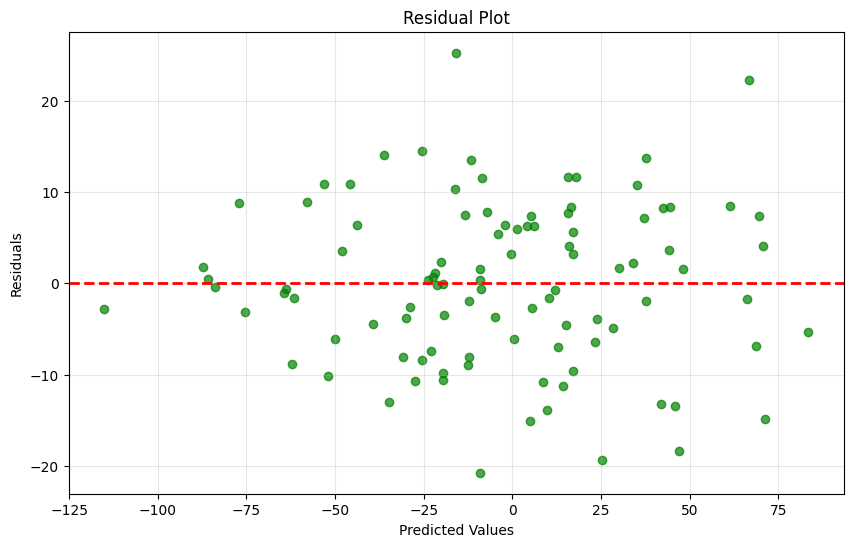

In [13]:
# Make predictions on the entire dataset
y_pred = predict(X, theta_optimized)

# Calculate MSE
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Calculate R-squared (coefficient of determination)
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)
print(f"R-squared: {r_squared:.4f}")

# Plot residuals
residuals = y - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='green')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)
plt.show()

### 9. Experimentation and Solutions

Now that you've implemented linear regression from scratch, let's explore some important concepts:

=== Exercise 9.1: Learning Rate Effects ===
Iteration 0: Cost = 849.8005
Iteration 100: Cost = 725.3637
Iteration 200: Cost = 620.2933
Iteration 300: Cost = 531.5276
Iteration 400: Cost = 456.4972
Iteration 0: Cost = 837.6664
Iteration 100: Cost = 191.9551
Iteration 200: Cost = 69.3156
Iteration 300: Cost = 45.1595
Iteration 400: Cost = 40.2858
Iteration 0: Cost = 721.4444
Iteration 100: Cost = 39.0272
Iteration 200: Cost = 39.0271
Iteration 300: Cost = 39.0271
Iteration 400: Cost = 39.0271


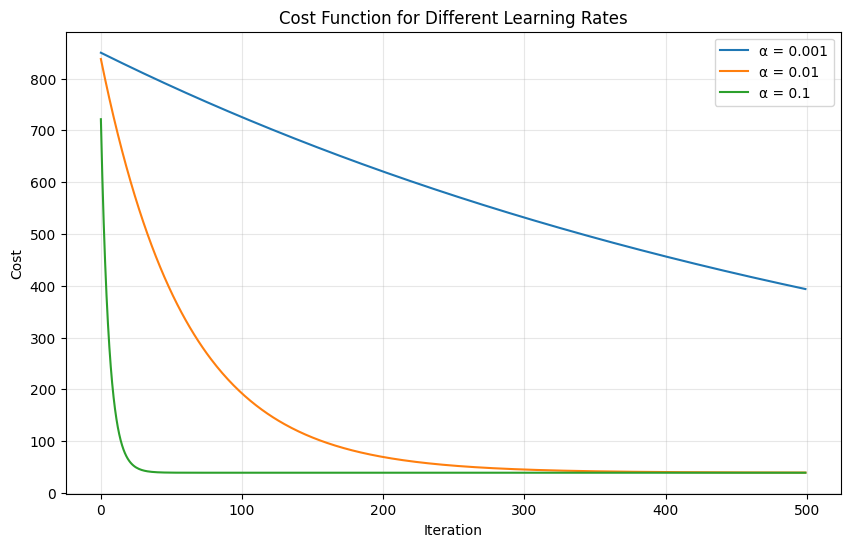

Analysis: Learning rate 0.01 converges fastest to the minimum.
Learning rate 0.001 is too slow, 0.1 might overshoot and oscillate.

=== Exercise 9.2: Feature Scaling ===
Iteration 0: Cost = 51383145.7142
Iteration 100: Cost = nan
Iteration 200: Cost = nan
Iteration 300: Cost = nan
Iteration 400: Cost = nan
Iteration 500: Cost = nan
Iteration 600: Cost = nan
Iteration 700: Cost = nan
Iteration 800: Cost = nan
Iteration 900: Cost = nan
Iteration 0: Cost = 1.9937
Iteration 100: Cost = 0.2628
Iteration 200: Cost = 0.0389
Iteration 300: Cost = 0.0099
Iteration 400: Cost = 0.0061
Iteration 500: Cost = 0.0056
Iteration 600: Cost = 0.0056
Iteration 700: Cost = 0.0056
Iteration 800: Cost = 0.0056
Iteration 900: Cost = 0.0056
Without scaling - theta: [nan nan nan]
With scaling - theta: [-0.19060833  1.72888655  0.9816418 ]
Feature scaling helps gradient descent converge faster and more reliably!

=== Exercise 9.3: Convergence Analysis ===
Iteration 0: Cost = 837.6664
Iteration 100: Cost = 191.95

/tmp/ipykernel_8211/2084675869.py:17: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum(errors ** 2)
/tmp/ipykernel_8211/338882363.py:22: RuntimeWarning: overflow encountered in dot
  gradient = (1 / m) * np.dot(X.T, errors)
/tmp/ipykernel_8211/338882363.py:22: RuntimeWarning: invalid value encountered in dot
  gradient = (1 / m) * np.dot(X.T, errors)
/tmp/ipykernel_8211/338882363.py:23: RuntimeWarning: invalid value encountered in subtract
  theta = theta - alpha * gradient


In [14]:
# Exercise 9.1 Solution: Learning Rate Effects
print("=== Exercise 9.1: Learning Rate Effects ===")
alphas = [0.001, 0.01, 0.1]
cost_histories = []

for alpha in alphas:
    theta_temp = np.zeros((X.shape[1], 1))
    _, cost_history = gradient_descent(X, y, theta_temp, alpha, 500)
    cost_histories.append(cost_history)

# Plot comparison
plt.figure(figsize=(10, 6))
for i, alpha in enumerate(alphas):
    plt.plot(cost_histories[i], label=f'α = {alpha}')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function for Different Learning Rates')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Analysis: Learning rate 0.01 converges fastest to the minimum.")
print("Learning rate 0.001 is too slow, 0.1 might overshoot and oscillate.")

# Exercise 9.2 Solution: Feature Scaling
print("\n=== Exercise 9.2: Feature Scaling ===")

def feature_normalize(X):
    """Normalize features using z-score normalization"""
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

# Create features with different scales
X_unscaled = np.random.randn(100, 2)
X_unscaled[:, 1] = X_unscaled[:, 1] * 1000  # Very different scale
y_test = X_unscaled[:, 0] * 2 + X_unscaled[:, 1] * 0.001 + np.random.randn(100) * 0.1

X_unscaled = np.column_stack([np.ones(X_unscaled.shape[0]), X_unscaled])
y_test = y_test.reshape(-1, 1)

# Test without scaling
theta_unscaled = np.zeros((X_unscaled.shape[1], 1))
theta_unscaled_opt, _ = gradient_descent(X_unscaled, y_test, theta_unscaled, 0.01, 1000)

# Test with scaling
X_scaled, _, _ = feature_normalize(X_unscaled[:, 1:])  # Don't scale intercept
X_scaled = np.column_stack([np.ones(X_scaled.shape[0]), X_scaled])
theta_scaled = np.zeros((X_scaled.shape[1], 1))
theta_scaled_opt, _ = gradient_descent(X_scaled, y_test, theta_scaled, 0.01, 1000)

print(f"Without scaling - theta: {theta_unscaled_opt.flatten()}")
print(f"With scaling - theta: {theta_scaled_opt.flatten()}")
print("Feature scaling helps gradient descent converge faster and more reliably!")

# Exercise 9.3 Solution: Convergence Analysis
print("\n=== Exercise 9.3: Convergence Analysis ===")
theta_convergence = np.zeros((X.shape[1], 1))
theta_conv_opt, cost_history_conv = gradient_descent(X, y, theta_convergence, 0.01, 2000)

# Find when cost stops decreasing significantly
cost_diffs = np.abs(np.diff(cost_history_conv))
convergence_threshold = 1e-6
convergence_iter = np.where(cost_diffs < convergence_threshold)[0]

if len(convergence_iter) > 0:
    print(f"Algorithm converged after {convergence_iter[0]} iterations")
else:
    print("Algorithm didn't fully converge within 2000 iterations")
    
print(f"Final cost: {cost_history_conv[-1]:.6f}")
print("Running for more iterations won't significantly improve the solution.")

### Key Takeaways

1. **Linear Regression** is a fundamental supervised learning algorithm for predicting continuous values.

2. **Cost Function** (MSE) measures how well our model fits the data - we want to minimize this.

3. **Gradient Descent** is an optimization algorithm that iteratively updates parameters to minimize the cost.

4. **Learning Rate** (α) controls how big each step is - too small is slow, too large may not converge.

5. **Feature Scaling** helps gradient descent converge faster and more reliably.

6. **Vectorization** makes our code efficient and is crucial for large datasets.

### Next Steps

In the next notebook, we'll extend these concepts to multiple linear regression with multiple features and explore more advanced topics like feature engineering and polynomial regression.